In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

In [3]:
data = pd.read_csv("C:/Users/NEHA CHOUDHARY/Downloads/playstore-analysis (2) (1).csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [5]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data Cleanning – Missing value treatment

a-->Drop records where rating is missing since rating is our target/study variable

In [8]:
print(f"Missing Values :\n{data.isnull().sum()}")

Missing Values :
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


Here we can clearly see that in column rating 1474 values are missing. Also missing values in various colmn as below : Type 1 Content Rating 1 Current Ver 8 Android Ver 3 So as per requirement we drop missing values in Rating colmn

In [9]:
data1=data.dropna(subset=['Rating'])

In [10]:
print(f"Missing Values :\n{data1.isnull().sum()}")

Missing Values :
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64


b-->Check the null values for the Android Ver column.

In [11]:
print(f"Missing Values :\n{data1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [14]:
 print (data1[data1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

Values are as below : 4453 Personalization July 20, 2018 4.4 NaN 4490 Personalization March 27, 2018 1.1 NaN 10472 February 11, 2018 1.0.19 4.0 and up NaN

In [16]:
data2 = data1.drop(10472)
# Verification
verify = data2[data2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


So here we successfully drop 'Life Made WI-Fi Touchscreen Photo Frame' as in output we found an empty dataframe. iii. Replace remaining missing values with the mode.

In [17]:
import statistics
Android_list = data2['Android Ver'].to_list()
# print(Android_list)
# O/P ['4.2 and up', '1.5 and up', nan, nan, '4.0 and up', '4.0 and up']

# Did Manual work(illegal)
Al=[4.2,1.5,4.0,4.0]
# print(Al)
# print(statistics.mode(Al))
data2_new = data2.fillna(statistics.mode(Al))

print(data2_new.loc[[4453]])
print('--------------------------------------------------------------------')
print(data2_new.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


Now Android Ver is 4 for Category 'PERSONALIZATION'


c. Current ver – replace with most common value

In [20]:
print(f"Missing Values :{data2_new['Current Ver'].isnull().sum()}")

Missing Values :0


No missing value is observed

# Data clean up - correcting the data type

a. Which all variables need to be brought to numeric types?

In [21]:
data2_new['Reviews'] = data2_new['Reviews'].astype(int)
data2_new['Size'] = data2_new['Size'].astype(int)
# Additional conversion
data2_new['Last Updated'] = data2_new['Last Updated'].astype('datetime64[ns]')

b. Price variable – remove $ sign and convert to float

In [25]:
data2_new['Price'] = data2_new['Price'].str.replace('$', '')

<ipython-input-25-847109fb3662>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data2_new['Price'] = data2_new['Price'].str.replace('$', '')


In [26]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


$ symbol successfully removed from Price colmn.

In [27]:
data2_new['Price'] = data2_new['Price'].astype(float)

In [28]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


Here we converted various colmn attributes in as following data type : 2 Rating 9366 non-null float64 3 Reviews 9366 non-null int32 4 Size 9366 non-null int32 7 Price 9366 non-null float64 10 Last Updated 9366 non-null datetime64[ns]

c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [30]:
data2_new['Installs'] = data2_new['Installs'].str.replace('+','')

<ipython-input-30-db66b5f28b7d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data2_new['Installs'] = data2_new['Installs'].str.replace('+','')


In [31]:
data2_new['Installs'] = data2_new['Installs'].str.replace(',', '')

In [32]:
data2_new['Installs'] = data2_new['Installs'].astype(int)

In [33]:
data2_new.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [34]:
data2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


Successfully removed + and , sign from colmn Installs as well as change datatype to int as per requirement

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [35]:
pd.unique(data2_new[['Rating']].values.ravel())
#.ravel()-->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2]) Yes all Avg. rating values is in between 1 and 5 i. Are there any such records? Drop if so. --> No such record has been oberved.

b. Reviews should not be more than installs as only those who installed can review the app.

In [36]:
df = pd.DataFrame()
df = data2_new[data2_new.Reviews <= data2_new.Installs]
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [37]:
df.shape

(9359, 13)

As per condition we got 9359 rows of data.


# 4. Identify and handle outliers –

a. Price column

i. Make suitable plot to identify outliers in price

C:\Users\NEHA CHOUDHARY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


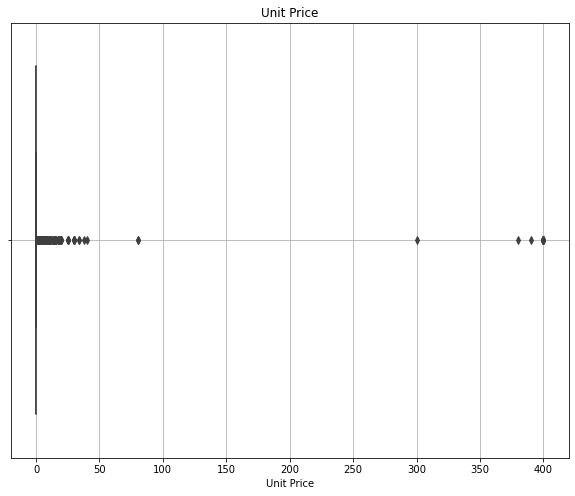

In [38]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()


As using above boxplot we can observe the outliers in price colmn.ii. Do you expect apps on the play store to cost $200? Check out these cases

In [39]:
rslt_df = data2_new[data2_new['Price'] == 200]
print(rslt_df)
# old data analysis (before data cleanning)
# rslt_df = data[data['Price'] == '$200.00']
# print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


in original dataframe there is a row of app $200 but if you see rating colmn is blank and priviously we drop data whose Rating value is null. Hence in new data frame we got Empty DataFrameiii. After dropping the useless records, make the suitable plot again to identify outliers --> To fullfill above contion let's remove whose price value is 0.

C:\Users\NEHA CHOUDHARY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


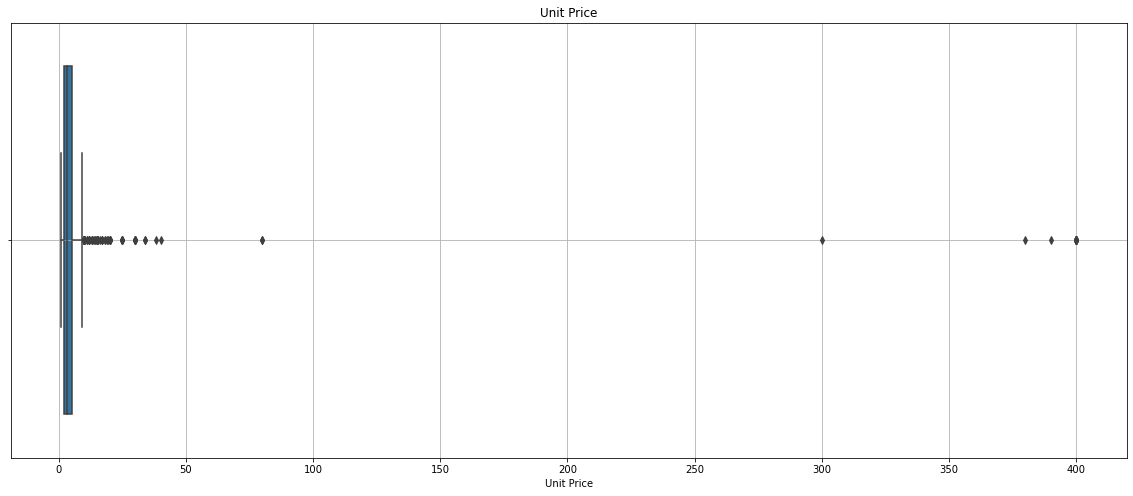

In [40]:
usful_df = df[df['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

iv. Limit data to records with price < $30

In [42]:
limit_data = df[df['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [43]:
limit_data.shape

(9338, 13)

As per condition we got data of row 9338


b. Reviews column

i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

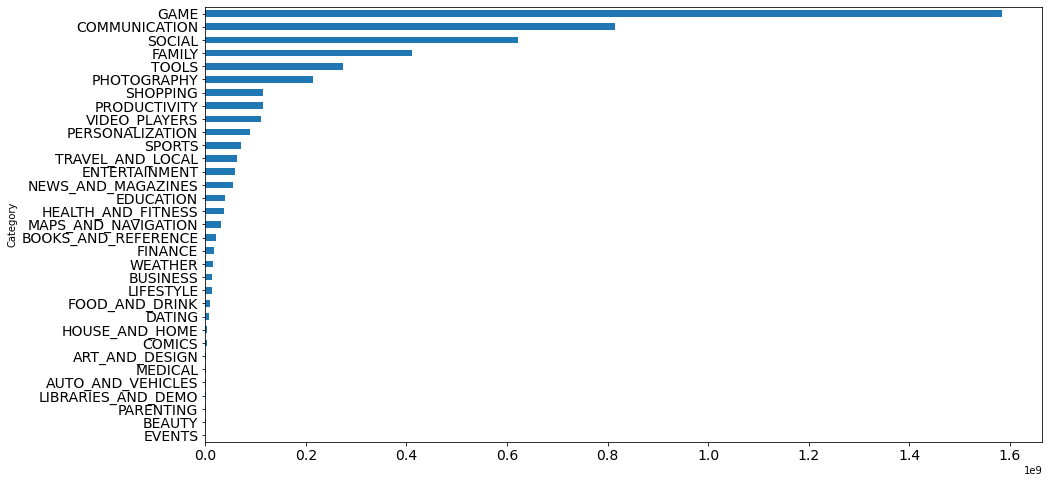

In [44]:
total=df.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

Top 5 Reviewed Apps by Category Category GAME 1585419555 COMMUNICATION 815461799 SOCIAL 621241071 FAMILY 410223081 TOOLS 273184168ii. Limit data to apps with < 1 Million reviews

In [47]:
limit_data_by_review = df[df['Reviews'] < 1000000]
limit_data_by_review.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [48]:
limit_data_by_review.shape

(8655, 13)

We found 8655 rows of limited data to apps with < 1 Million reviews


c. Installs

i. What is the 95th percentile of the installs?

In [50]:
val = df.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


95th percentile of the installs is 100000000.0ii. Drop records having a value more than the 95th percentile

In [51]:
# Verification
x = df.Installs.quantile() > val
print (x)

False


There is no value more than the 95th percentile.

# Data analysis to answer business questions

1. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\NEHA CHOUDHARY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


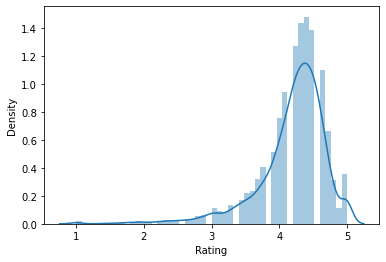

In [52]:
sns.distplot(df['Rating'])
plt.show()

A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.The mean is also on the left of the peak.

Here you can see three measures position on the plot. So, you will find that: mean less than the mode median less than the mode mean less than median Here the distribution tells that most of the rating is in between 4 to 5.

b. What is the implication of this on your analysis?

Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model. Conclusion: If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.


What are the top Content Rating values?

In [53]:
df['Content Rating'].value_counts()

Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

top Content Rating values : Content Rating Everyone 7414 Teen 1083 Mature 17+ 461 Everyone 10+ 397 Adults only 18+ 3 Unrated 1a. Are there any values with very few records? Yes. 'Unrated' Content Rating has value 1 and Adults only 18+ -->3

In [54]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

C:\Users\NEHA CHOUDHARY\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        7414
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

1. Effect of size on rating

a.Make a joinplot to understand the effect of size on rating

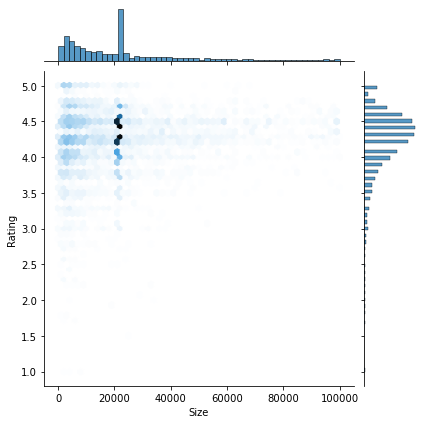

In [58]:
sns.jointplot(x=df['Size'],y=df['Rating'],data=df,kind='hex')
plt.show()
# hex, kde, hist, dist are different types of it.

b. Do you see any patterns? c. How do you explain the pattern?

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000(40 mb). Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

Effect of price on rating

a. Make a jointplot (with regression line)

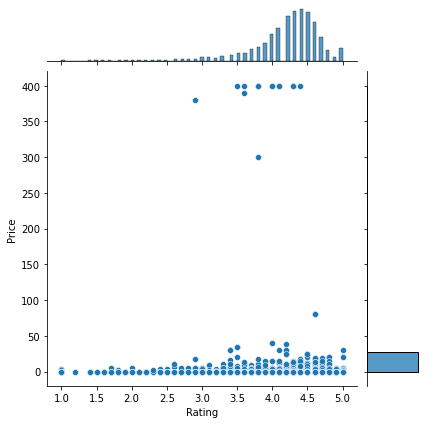

In [61]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df)
plt.show()

b. What pattern do you see?

c. How do you explain the pattern?

increasing the price, Rating Increases

d. Replot the data, this time with only records with price > 0

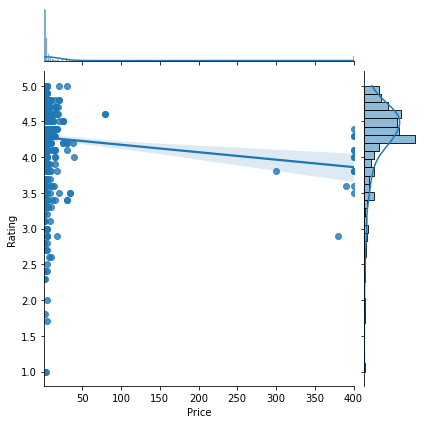

In [62]:
Price_greaterthan_zero = df[df['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

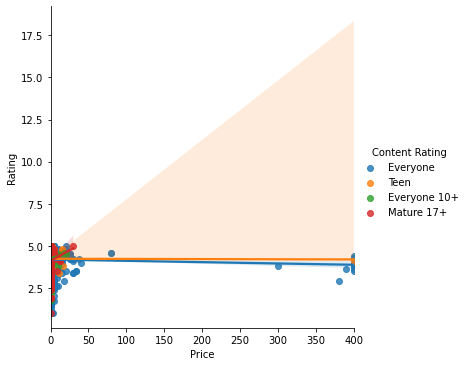

In [63]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df)
plt.show()

Mature and Teen are more posively co-related in Content rating than 10+ and everyone

Look at all the numeric interactions together – a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

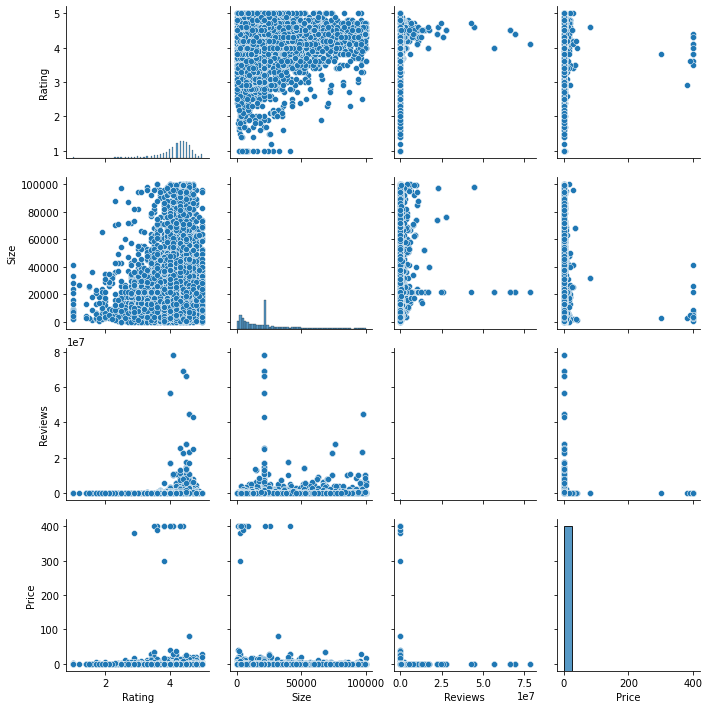

In [64]:
sns.pairplot(df,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

This is the basic exploratory analysis to look for any evident patterns or relationships between the features.

Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

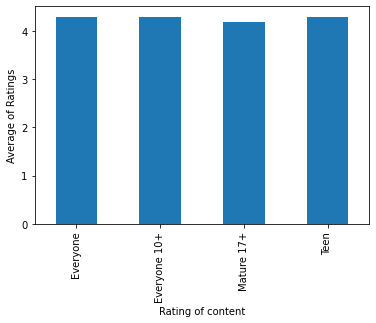

In [65]:
a = df['Rating'].groupby(df['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

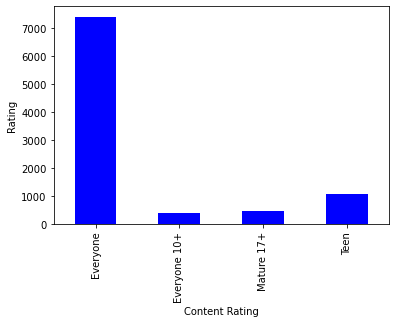

In [66]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

C:\Users\NEHA CHOUDHARY\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


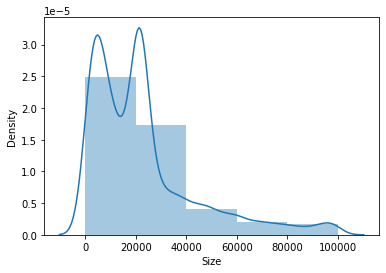

In [68]:
#Checking skewness
sns.distplot(df["Size"], bins=5)
plt.show()

bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [70]:
df.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [71]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this

i. Annotated

ii. Greens color map

In [72]:
Size_Buckets =pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


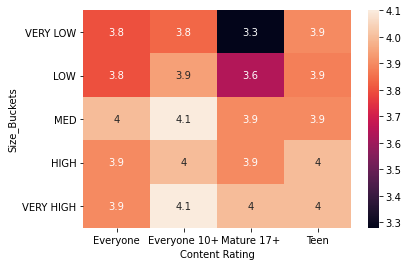

In [73]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

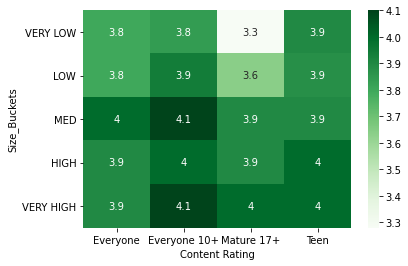

In [75]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

# THANK YOU